## Business analysis

1. What is the tweet with the greatest social impact?
2. Which user mentions the school the most?
3. In which month is the greatest number of tweets concentrated?
4. Mathematical correlation between public metrics.
5. Most frequent words, and the reason of it.

In [1]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import phik
import re

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 


In [2]:
full = pd.read_csv('../data/raw_data.csv')
tweets = pd.read_csv('../data/tweets.csv')
users = pd.read_csv('../data/users.csv')
print(full.shape)
print(tweets.shape)
print(users.shape)


(178, 25)
(178, 7)
(178, 2)


In [5]:
full.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
0,1577654769098842112,1577654769098842112,2022-10-05 15:39:43 Hora de verano romance,2022-10-05,15:39:43,200,1162694149956603904,thebridge_tech,The Bridge,Ya están aquí nuestros primeros mini emprended...,...,2,3,[],[],https://twitter.com/TheBridge_Tech/status/1577...,False,NaN,1,https://pbs.twimg.com/media/FeTz56VXgAEoODd.jpg,[]
1,1577564440530124802,1577564440530124802,2022-10-05 09:40:47 Hora de verano romance,2022-10-05,09:40:47,200,1162694149956603904,thebridge_tech,The Bridge,¡Feliz Día a nuestros Lead Instructors y Teach...,...,2,2,"['bootcamp', 'digital', 'diamundialdelosdocent...",[],https://twitter.com/TheBridge_Tech/status/1577...,False,NaN,1,https://pbs.twimg.com/tweet_video_thumb/FeSgh4...,[]
2,1577334577701453827,1577334577701453827,2022-10-04 18:27:23 Hora de verano romance,2022-10-04,18:27:23,200,1003872445,paumugarra,Pau Mugarra,Recordaros que la semana que viene tenemos la ...,...,2,12,['cps'],[],https://twitter.com/PauMugarra/status/15773345...,False,NaN,0,NaN,[]
3,1576951801047179264,1576951801047179264,2022-10-03 17:06:22 Hora de verano romance,2022-10-03,17:06:22,200,1162694149956603904,thebridge_tech,The Bridge,¡Vuelven las #becas Digital Talent Pipeline! ...,...,1,1,"['becas', 'bootcamp', 'dtp', 'becasformacion',...",[],https://twitter.com/TheBridge_Tech/status/1576...,False,NaN,1,https://pbs.twimg.com/media/FeJ01sEWAAEuiPI.jpg,[]
4,1576902991507922944,1576902991507922944,2022-10-03 13:52:25 Hora de verano romance,2022-10-03,13:52:25,200,2529499620,formacion_fuc3,Formación Fundación Universidad Carlos III,El desarrollador web es uno de los perfiles má...,...,3,3,['bootcamp'],[],https://twitter.com/formacion_fuc3/status/1576...,False,NaN,1,https://pbs.twimg.com/media/FeJI53SWIAI1WiY.jpg,[]


In [10]:
pd.set_option('max_colwidth', None) # to read the entire tweets
tweets.head()

,id,tweet,date,retweets_count,replies_count,likes_count
0,1577654769098842112,Ya están aquí nuestros primeros mini emprendedores 🤩 pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de @GenyusSchool descubren su YO emprendedor mientras se divierten👏 ¡Aún estás a tiempo!👉 https://t.co/uaEMCO1jGy https://t.co/80gibJEUcI,2022-10-05,2,0,3
1,1577564440530124802,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! 🎉 Sabemos que en ocasiones un #bootcamp es duro para tod@s pero cada día dais el 💯% ¡Gracias por hacer lo #digital mucho más fácil! #diamundialdelosdocentes #data #ciber #desarrollowebfullstack #mkt #uxui #cloud https://t.co/Qnehy8ODCq,2022-10-05,2,0,2
2,1577334577701453827,"Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀",2022-10-04,2,0,12
3,1576951801047179264,"¡Vuelven las #becas Digital Talent Pipeline! 1⃣0⃣0⃣ becas para formarte en la próxima edición de nuestros #bootcamp en Madrid, Valencia y Sevilla. ¡Solicita ya tu beca!🏃‍♀️ https://t.co/V5kikwpJrD #dtp #becasformacion #digitaltalent https://t.co/q7RVbD2iLU",2022-10-03,1,0,1
4,1576902991507922944,El desarrollador web es uno de los perfiles más demandados en el mercado laboral 📈 Descubre nuestro #bootcamp Desarrollo Web Full Stack de la mano de @TheBridge_Tech 💻 Toda la información aquí! 👇 https://t.co/LOoTu97aQq https://t.co/xpaAzxXSDX,2022-10-03,3,0,3


In [11]:
users.head()

,user_id,username
0,1162694149956603904,thebridge_tech
1,1162694149956603904,thebridge_tech
2,1003872445,paumugarra
3,1162694149956603904,thebridge_tech
4,2529499620,formacion_fuc3


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              178 non-null    int64 
 1   tweet           178 non-null    object
 2   date            178 non-null    object
 3   retweets_count  178 non-null    int64 
 4   replies_count   178 non-null    int64 
 5   likes_count     178 non-null    int64 
 6   quote_url       9 non-null      object
dtypes: int64(4), object(3)
memory usage: 9.9+ KB


In [14]:
# We drop the column with high percentage of null values

tweets.drop(columns='quote_url', inplace=True)

In [20]:
# We change the format of the 'date' column

tweets['date'] =  pd.to_datetime(tweets['date']).apply(pd.to_datetime)
tweets.describe(include='all', datetime_is_numeric=True)

,id,tweet,date,retweets_count,replies_count,likes_count
count,1.780000e+02,178,178,178.000000,178.000000,178.000000
unique,NaN,175,NaN,NaN,NaN,NaN
top,NaN,"🤝🏼 @ceeivalencia y @TheBridge_Tech, primera aceleradora de talento digital, firman un convenio de colaboración: https://t.co/8neFc4j8i4 🎯 Complementar la formación técnica del nuevo talento, entre sus principales objetivos.",NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN
mean,1.550541e+18,NaN,2022-07-22 05:23:35.730337024,0.949438,0.398876,3.342697
min,1.536268e+18,NaN,2022-06-13 00:00:00,0.000000,0.000000,0.000000
25%,1.541494e+18,NaN,2022-06-27 00:00:00,0.000000,0.000000,1.000000
50%,1.542415e+18,NaN,2022-06-30 00:00:00,0.000000,0.000000,2.000000
75%,1.562450e+18,NaN,2022-08-24 00:00:00,1.000000,1.000000,4.000000
max,1.577655e+18,NaN,2022-10-05 00:00:00,11.000000,6.000000,22.000000


## 1. Which is the tweet with the greatest social impact?

In [22]:
# We understand that the impact can be measured with the summation of Twitter's public metrics. The message announces an event at the school.

tweets['repercusion'] = tweets['retweets_count'] + tweets['replies_count'] + tweets['likes_count'] 

tweets[tweets['repercusion'] == tweets['repercusion'].max()]

,id,tweet,date,retweets_count,replies_count,likes_count,repercusion
159,1541046264539893760,"🕣 TIC, TAC: MAÑANA os vemos a todos a las 7.30pm en nuestro evento en directo en MADRID en @TheBridge_Tech 🚨Para los que no vayáis, TRANQUILOS, seguramente el martes lo emitamos para todos vosotros :D",2022-06-26,6,6,17,29


 - Let's exlore what factors non related to the content of the tweets can influence its reprercusion

In [9]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               178 non-null    int64 
 1   conversation_id  178 non-null    int64 
 2   created_at       178 non-null    object
 3   date             178 non-null    object
 4   time             178 non-null    object
 5   timezone         178 non-null    int64 
 6   user_id          178 non-null    int64 
 7   username         178 non-null    object
 8   name             178 non-null    object
 9   tweet            178 non-null    object
 10  language         178 non-null    object
 11  mentions         178 non-null    object
 12  urls             178 non-null    object
 13  photos           178 non-null    object
 14  replies_count    178 non-null    int64 
 15  retweets_count   178 non-null    int64 
 16  likes_count      178 non-null    int64 
 17  hashtags         178 non-null    ob

In [6]:
# create the repercusion column in the df with more information
full['repercusion'] = full['retweets_count'] + full['replies_count'] + full['likes_count'] 

In [8]:
# ince the 1 refers to an empty value, we are going to replace them with zeros
full.fillna(0, inplace=True)

## 2. Which user mentions the school the most?

In [189]:
# the user who mentions the school the most (except herself) is @heavy_mental (12 tweets of 178), followed by mulder01198676 (9 tweets)
users['username'].value_counts().head(10)

thebridge_tech     32
heavymental_es     12
mulder01198676      9
joobid              6
designetworking     6
fujitsu_es          4
moquintana          4
diegodl             4
emprenemjunts       4
paumugarra          3
Name: username, dtype: int64

In [190]:
# @heavy_metal emits 0.06% of the tweets that mention the school
users['username'].value_counts(normalize=True).head(10)

thebridge_tech     0.179775
heavymental_es     0.067416
mulder01198676     0.050562
joobid             0.033708
designetworking    0.033708
fujitsu_es         0.022472
moquintana         0.022472
diegodl            0.022472
emprenemjunts      0.022472
paumugarra         0.016854
Name: username, dtype: float64

## 3. In which month is the greatest number of tweets concentrated?

In [71]:
# count of tweets per month
tweets.groupby(tweets['date'].dt.month).count()['id']

date
6     93
7     28
8     19
9     32
10     6
Name: id, dtype: int64

In [61]:
# count of publis metrics per month
tweets.groupby(tweets['date'].dt.month).sum()

,id,retweets_count,replies_count,likes_count,repercusion
date,,,,,
6,1.432962e+20,39.0,54.0,324.0,417.0
7,4.334506e+19,39.0,8.0,91.0,138.0
8,2.964215e+19,41.0,0.0,59.0,100.0
9,5.024961e+19,40.0,9.0,99.0,148.0
10,9.463265e+18,10.0,0.0,22.0,32.0


## 4. Correlations between public metrics:

interval columns not set, guessing: ['retweets_count', 'replies_count', 'likes_count']


<AxesSubplot:>

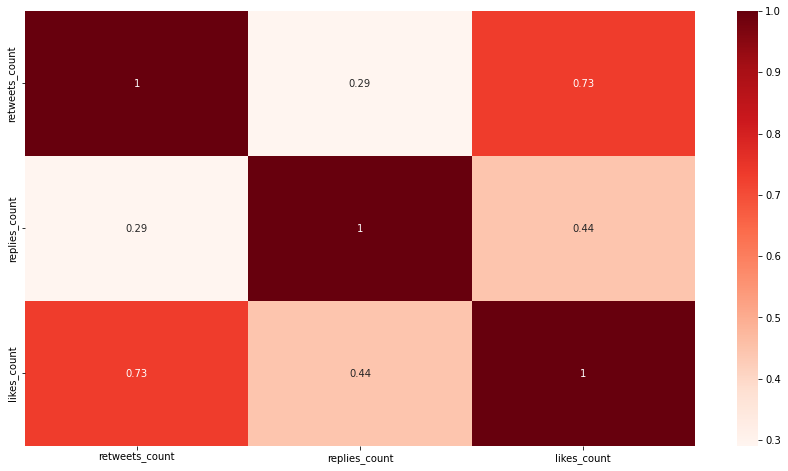

In [100]:
metrics = tweets[['retweets_count', 'replies_count', 'likes_count']]
plt.figure(figsize=(15,8))
sns.heatmap(metrics.phik_matrix(), annot=True, cmap='Reds')

## 5. Which words are more frequent?


In [161]:
text = tweets['tweet']

In [176]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\#)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_text(text):
    
    text = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in text]
    text = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in text]
    
    return text

text_clean = preprocess_text(text)

In [167]:

spanish_stop_words = stopwords.words('spanish')

def remove_stop_words(text):
    removed_stop_words = []
    for review in text:
        
        removed_stop_words.append(
            ' '.join([word for word in review.split() if word not in spanish_stop_words]))
        
    return removed_stop_words

no_stop_words_text = remove_stop_words(text_clean)

In [178]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_clean)

baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(no_stop_words_text)

CountVectorizer(binary=True)

In [180]:
X_baseline = baseline_vectorizer.transform(no_stop_words_text)

x = baseline_vectorizer.vocabulary_

sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
top_words = sorted_x[:50]
top_words[:30]

[('𝘁𝗿𝗶𝗽𝘂𝗹𝗮𝗰𝗶𝗼𝗻𝗲𝘀', 1344),
 ('𝗱𝗲', 1343),
 ('𝗗𝗲𝘀𝗮𝗳𝗶𝗼', 1342),
 ('último', 1341),
 ('últimas', 1340),
 ('última', 1339),
 ('éxito', 1338),
 ('área', 1337),
 ('ánimo', 1336),
 ('ámbito', 1335),
 ('ágora', 1334),
 ('zvmtzttnkm', 1333),
 ('zuptdzn', 1332),
 ('zuoqnwwch', 1331),
 ('zoom', 1330),
 ('zonas', 1329),
 ('zhovlnbp', 1328),
 ('zgvkix', 1327),
 ('zas', 1326),
 ('yvwlopivv', 1325),
 ('ytrvxkq', 1324),
 ('ytrvao', 1323),
 ('ytpokcith', 1322),
 ('youtube', 1321),
 ('you', 1320),
 ('yotethhikx', 1319),
 ('ylrazyt', 1318),
 ('yesterday', 1317),
 ('yes', 1316),
 ('yellowers', 1315)]

- the Crews Challenge ('Desafío de Tripulaciones') is the topic that drives the most tweets; this is the challenging final project of the bootcamp;
- the ratio between tweets and school days is higher in August (even keep in mind that in that month there are three weeks of vacation) than in September;
- the most popular space of the school is the 'Agora', a multi-purpose room for eating, meeting and relax; 
- the most mentioned school is wbscodingschool;
- the most mentioned platform is YouTube.
